<a href="https://colab.research.google.com/github/dggasque/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

### Confidence Intervals:

In [0]:
columns = ["party",
           "handicapped-infants",
           "water-project-cost-sharing",
           "adoption-of-the-budget-resolution",
           "physician-fee-freeze","el-salvador-aid",
           "religious-groups-in-schools","anti-satellite-test-ban",
           "aid-to-nicaraguan-contras", "mx-missile", "immigration",
           "synfuels-corporation-cutback", 
           "education-spending","superfund-right-to-sue",
           "crime",
           "duty-free-exports", 
           "export-administration-act-south-africa"]

In [57]:
# Load data 
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data", names=columns)
print(df.shape)
df.head()

(435, 17)


,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [58]:
# Turn '?' into NaN values and convert Y and N responses to numerical values 1 and 0
import numpy as np

df =df.replace({'?':np.NaN, 'n':0, 'y':1})
df.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
# split dataframe by party

rep = df[df['party']=='republican']

dem = df[df['party']=='democrat']

In [60]:
stats.ttest_1samp(rep["religious-groups-in-schools"], 0, nan_policy='omit')

Ttest_1sampResult(statistic=38.02862698794469, pvalue=1.4751069893318224e-83)

In [0]:
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean, mean - interval, mean + interval)

In [62]:
CI = confidence_interval(rep["religious-groups-in-schools"].dropna())
CI

(0.8975903614457831, 0.850987486003394, 0.9441932368881721)

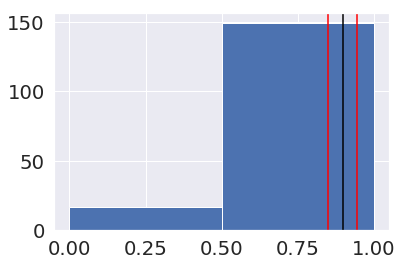

In [63]:
rep["religious-groups-in-schools"].dropna().hist(bins=2)
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='black');

The confidence interval shows that there is a 95% confidence that the population mean is within the bounds of the interval [0.85, 0.94]

### Chi-squared tests

In [0]:
column_headers = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                 'marital-status', 'occupation', 'relationship', 'race', 'sex', 
                 'capital-gain', 'capital-loss', 'hours-per-week', 
                 'native-country', 'income']
adults = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', names=column_headers, na_values=" ?")

In [65]:
adults.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [66]:
adults.describe(exclude='number')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [67]:
crosstab = pd.crosstab(adults['sex'], adults['education'], margins=True)
crosstab

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,All
sex,,,,,,,,,,,,,,,,,
Female,295,432,144,46,84,160,144,421,500,1619,86,3390,536,16,92,2806,10771
Male,638,743,289,122,249,486,370,646,882,3736,327,7111,1187,35,484,4485,21790
All,933,1175,433,168,333,646,514,1067,1382,5355,413,10501,1723,51,576,7291,32561


In [68]:
education = crosstab.columns.to_list()[:-1]
education

[' 10th',
 ' 11th',
 ' 12th',
 ' 1st-4th',
 ' 5th-6th',
 ' 7th-8th',
 ' 9th',
 ' Assoc-acdm',
 ' Assoc-voc',
 ' Bachelors',
 ' Doctorate',
 ' HS-grad',
 ' Masters',
 ' Preschool',
 ' Prof-school',
 ' Some-college']

In [69]:
femalecount = crosstab.iloc[0][0:16].values
femalecount

array([ 295,  432,  144,   46,   84,  160,  144,  421,  500, 1619,   86,
       3390,  536,   16,   92, 2806])

In [70]:
malecount = crosstab.iloc[1][0:16].values
malecount

array([ 638,  743,  289,  122,  249,  486,  370,  646,  882, 3736,  327,
       7111, 1187,   35,  484, 4485])

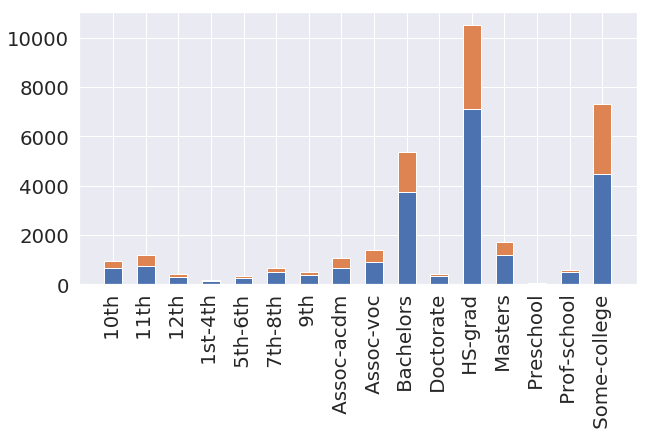

In [71]:
#Plot bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
p1 = plt.bar(education, malecount, 0.55) 
p2 = plt.bar(education, femalecount, 0.55, bottom=malecount)
plt.xticks(education, rotation='vertical');

In [72]:
# Calculate expected value
row_sums = crosstab.iloc[0:2, 16].values
col_sums = crosstab.iloc[2, 0:16].values

print(row_sums)
print(col_sums)

[10771 21790]
[  933  1175   433   168   333   646   514  1067  1382  5355   413 10501
  1723    51   576  7291]


In [73]:
total = crosstab.loc['All','All']
total

32561

In [74]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column * row_sums[i] / total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)  
print(expected)

(2, 16)
[[ 308.63127668  388.6835478   143.2340223    55.57347747  110.15457142
   213.69325266  170.02837751  352.95774086  457.15801112 1771.40459445
   136.61813212 3473.67313657  569.95893861   16.87051995  190.53763705
  2411.82276343]
 [ 624.36872332  786.3164522   289.7659777   112.42652253  222.84542858
   432.30674734  343.97162249  714.04225914  924.84198888 3583.59540555
   276.38186788 7027.32686343 1153.04106139   34.12948005  385.46236295
  4879.17723657]]


In [75]:
observed = pd.crosstab(adults['sex'], adults['education']).values
print(observed.shape)
observed

(2, 16)


array([[ 295,  432,  144,   46,   84,  160,  144,  421,  500, 1619,   86,
        3390,  536,   16,   92, 2806],
       [ 638,  743,  289,  122,  249,  486,  370,  646,  882, 3736,  327,
        7111, 1187,   35,  484, 4485]])

In [76]:
# Calculate Chi-Squared
chi_squared = ((observed-expected)**2/(expected)).sum()

print(f"Chi-Squared: {chi_squared}")

Chi-Squared: 297.71500372503687


**Chi-Squared using Scipy**

In [77]:
stats.chi2_contingency(observed)

(297.71500372503687,
 1.667778440920507e-54,
 15,
 array([[ 308.63127668,  388.6835478 ,  143.2340223 ,   55.57347747,
          110.15457142,  213.69325266,  170.02837751,  352.95774086,
          457.15801112, 1771.40459445,  136.61813212, 3473.67313657,
          569.95893861,   16.87051995,  190.53763705, 2411.82276343],
        [ 624.36872332,  786.3164522 ,  289.7659777 ,  112.42652253,
          222.84542858,  432.30674734,  343.97162249,  714.04225914,
          924.84198888, 3583.59540555,  276.38186788, 7027.32686343,
         1153.04106139,   34.12948005,  385.46236295, 4879.17723657]]))

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)